In [1]:
import time
# get the start time
st = time.time()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *
import math

d=8 
T,M,W = 2, 40, 30    #1, 2 , 30  
hbar=1
m00, p00, n00= 1, 7, 1
Omn = 1
Vpq = 1

xi = exp(2*pi*(1j)/d)
wr = lambda r : r * 2*pi/T                    # wn = w(r) = \omega(r) = r\omega_0 = r.w(1)
N = int(W/wr(1))                              # number of Alvarez-Suter expreriments in each measurement set
print(N)

def delta(s1,s2):                            # kronecker delta function 
    if s1 == s2:    return 1
    else:           return 0

def deltai(s1,s2,i):                            # kronecker delta function when numbers are repeating with mod i
    if fmod(s1,i) == fmod(s2,i):    return 1
    else:                                     return 0
    
def fmodm(a):
    return int(fmod(-a,d)) 

9


In [3]:
def y(i0,j0,a,b):
       return deltai(a,b,d) +  1/d * (xi**(-b*j0) - xi**(-b*i0)) * (xi**(a*i0) - xi**(a*j0))

In [4]:
yVec =  np.zeros([d,d,d,d],dtype=complex)
measure =  np.zeros([d,d,d,d],dtype=complex)

yVec    = [[[[complex(y(i0,j0,a0,b0)) for b0 in range(d)]  for a0 in range(d)] for j0 in range(d)] for i0 in range(d)]
measure = [[[[complex(y(i0,j0,a0,b0)-np.conj(y(i0,j0,-a0,-b0))) for b0 in range(d)] \
                                                                 for a0 in range(d)] for j0 in range(d)] for i0 in range(d)]

print(yVec)
print(np.max(np.abs(measure)))

[[[[(1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j], [0j, (1+0j), 0j, 0j, 0j, 0j, 0j, 0j], [0j, 0j, (1+0j), 0j, 0j, 0j, 0j, 0j], [0j, 0j, 0j, (1+0j), 0j, 0j, 0j, 0j], [0j, 0j, 0j, 0j, (1+0j), 0j, 0j, 0j], [0j, 0j, 0j, 0j, 0j, (1+0j), 0j, 0j], [0j, 0j, 0j, 0j, 0j, 0j, (1+0j), 0j], [0j, 0j, 0j, 0j, 0j, 0j, 0j, (1+0j)]], [[(1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j], [0j, (0.9267766952966369+0j), (-0.12499999999999999+0.05177669529663687j), (-0.125+0.12499999999999999j), (-0.07322330470336313+0.17677669529663687j), (-3.435691964606215e-17+0.1767766952966369j), (0.051776695296636865+0.12500000000000003j), (0.05177669529663691+0.05177669529663692j)], [0j, (-0.12499999999999999-0.05177669529663687j), (0.75+0j), (-0.30177669529663687+0.12499999999999999j), (-0.25+0.24999999999999997j), (-0.12500000000000006+0.30177669529663687j), (-4.1633363423443364e-17+0.25000000000000006j), (0.051776695296636914+0.12500000000000008j)], [0j, (-0.125-0.12499999999999999j), (-0.30177669529663687-0.12499999999999999j), (0.5732233

In [5]:
def f(a,b,w,r):
    return (-1j)/w*\
                    nsum(lambda i: y(i,i+1,a,b)*\
                        ( exp( (1j) *w *(i+1)*T/(d*r) ) - \
                          exp( (1j) *w * i   *T/(d*r) ) ),[0,d-1])

ff =  np.zeros([d,d,N,N],dtype=complex)  
measuref =  np.zeros([d,d,N,N],dtype=complex)  

print(np.shape(ff))

ff = [[[[ complex(f(a, b, (k+1)*wr(1), r+1))  for r in range(N)]  for k in range(N)]   for b in range(d)]  for a in range(d)]
measuref = [[[[ complex(f(a, b, (k+1)*wr(1), r+1) - np.conj(f(-a, -b, -(k+1)*wr(1), r+1)))  for r in range(N)]\
                                                                                   for k in range(N)]\
                                                                                   for b in range(d)]  for a in range(d)]

print(ff[int(1)][int(2)][int(0)][int(0)])
print(np.shape(ff))
print(np.max(np.abs(measuref)))

(8, 8, 9, 9)
(-0.2636965437895247-5.3591144767534724e-17j)
(8, 8, 9, 9)
2.2321672218640817e-16


In [6]:
def LLf(b,bt):   
    return  d*Omn*Vpq *  (  1-xi**(n00*b) )  *  ( 1-xi**(n00*bt) )  *   xi**(n00 * m00)

LL = np.zeros([d,d],dtype=complex)

LL = [[ complex(LLf(b,bt)) for bt in range(d)]  for b in range(d)]
print(LL)

[[0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j], [0j, (-6.819140389836497e-16-4.686291501015239j), (3.313708498984758-7.999999999999999j), (7.999999999999997-8j), (11.313708498984758-4.6862915010152415j), (11.31370849898476-3.400326353594165e-15j), (8.000000000000002+3.313708498984757j), (3.313708498984764+3.313708498984761j)], [0j, (3.313708498984758-7.999999999999999j), (11.313708498984758-11.313708498984761j), (19.313708498984756-8.000000000000004j), (22.62741699796952-6.80065270718833e-15j), (19.313708498984763+7.999999999999994j), (11.313708498984765+11.313708498984756j), (3.313708498984765+8.000000000000004j)], [0j, (7.999999999999997-8j), (19.313708498984756-8.000000000000004j), (27.31370849898476-7.168548254435226e-15j), (27.313708498984763+11.31370849898475j), (19.31370849898477+19.313708498984756j), (8.00000000000001+19.31370849898476j), (5.912474287488206e-15+11.313708498984768j)], [0j, (11.313708498984758-4.6862915010152415j), (22.62741699796952-6.80065270718833e-15j), (27.31370849898476

In [7]:
def fafunc(a):
    return hbar/d * nsum(lambda p: ( (d-1)/2  -p ) * xi**(-a*p) ,[0,d-1])

fa = np.zeros([d],dtype=complex)

fa = [ complex(fafunc(a)) for a in range(d)]
print(fa)

[0j, (0.5000000000000002-1.2071067811865477j), (0.5000000000000003-0.49999999999999994j), (0.5000000000000002-0.20710678118654718j), (0.5000000000000001+5.495323605393214e-16j), (0.49999999999999967+0.20710678118654824j), (0.499999999999999+0.5000000000000008j), (0.49999999999999706+1.2071067811865472j)]


In [8]:
def Xifunc(k,r):
         return  nsum(lambda a,at,b,bt: \
                     fa[int(a)]*fa[int(at)] * \
                     LL[int(b)][int(bt)]  * \
                     deltai(  int( fmod( m00 + p00 , d ) )  ,  int( fmodm( b+bt ) )  ,d ) * \
                      \
              complex(ff[int(a)][int(b)][int(k)][int(r)]) * complex( np.conj( ff[int(-at)][int(-bt)][int(k)][int(r)] )  )\
                  ,[0,d-1],[0,d-1],[0,d-1],[0,d-1])

VecXi =  np.zeros([N,N],dtype=complex)  

VecXi = [[ complex(Xifunc(k,r))  for k in range(N)]  for r in range(N)]

#print(VecXi)
print(np.matrix(VecXi))

[[1.60007348e+01+1.60007348e+01j 1.26095017e+01+1.26095017e+01j
  7.90216208e+00+7.90216208e+00j 4.58527335e+00+4.58527335e+00j
  2.84477835e+00+2.84477835e+00j 1.40105574e+00+1.40105574e+00j
  3.26545609e-01+3.26545609e-01j 1.28940160e-31+1.28940160e-31j
  1.97539936e-01+1.97539936e-01j]
 [1.61765791e+01+1.61765791e+01j 4.00018371e+00+4.00018371e+00j
  2.21294064e+00+2.21294064e+00j 3.15237543e+00+3.15237543e+00j
  1.47372657e+00+1.47372657e+00j 1.97554052e+00+1.97554052e+00j
  1.22523914e+00+1.22523914e+00j 1.14631834e+00+1.14631834e+00j
  7.41194051e-01+7.41194051e-01j]
 [8.48274899e+00+8.48274899e+00j 5.40115401e+00+5.40115401e+00j
  1.77785943e+00+1.77785943e+00j 6.35848452e-01+6.35848452e-01j
  1.41736735e+00+1.41736735e+00j 1.40105574e+00+1.40105574e+00j
  7.38994126e-01+7.38994126e-01j 7.45554699e-01+7.45554699e-01j
  8.78018009e-01+8.78018009e-01j]
 [5.01299191e+00+5.01299191e+00j 4.04414476e+00+4.04414476e+00j
  2.48234185e+00+2.48234185e+00j 1.00004593e+00+1.00004593e+00j
  

In [9]:
AMat = np.zeros([N,N], dtype=complex)      

AMat = [[ complex(delta( (k+1)/(r+1) , floor( (k+1)/(r+1) ) ) *  M*wr(r+1)*  VecXi[r][k]   )    \
         for k in range(N)]  for r in range(N)]

#rint(A)
print(np.matrix(AMat))

[[2.01071164e+03+2.01071164e+03j 1.58455672e+03+1.58455672e+03j
  9.93014974e+02+9.93014974e+02j 5.76202442e+02+5.76202442e+02j
  3.57485391e+02+3.57485391e+02j 1.76061857e+02+1.76061857e+02j
  4.10349314e+01+4.10349314e+01j 1.62030984e-29+1.62030984e-29j
  2.48236005e+01+2.48236005e+01j]
 [0.00000000e+00+0.00000000e+00j 1.00535582e+03+1.00535582e+03j
  0.00000000e+00+0.00000000e+00j 7.92278358e+02+7.92278358e+02j
  0.00000000e+00+0.00000000e+00j 4.96507487e+02+4.96507487e+02j
  0.00000000e+00+0.00000000e+00j 2.88101221e+02+2.88101221e+02j
  0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  6.70237214e+02+6.70237214e+02j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 5.28185572e+02+5.28185572e+02j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  3.31004991e+02+3.31004991e+02j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 5.02677910e+02+5.02677910e+02j
  

In [ ]:
def phi(i,n,r):
    return ( i / d + n ) * T/(r+1)

def Phii(l,i1,i2,n1,n2,r):
    if  l==1:    return    (1j) * ( phi( i1+1 , n1 , r ) - phi( i2+1 , n2 , r )  )   
    if  l==2:    return    (1j) * ( phi( i1+1 , n1 , r ) - phi( i2   , n2 , r )  )    
    if  l==3:    return    (1j) * ( phi( i1   , n1 , r ) - phi( i2+1 , n2 , r )  )   
    if  l==4:    return    (1j) * ( phi( i1   , n1 , r ) - phi( i2   , n2 , r )  )

In [ ]:
#def spectA1(w):
#    return  0.5*exp(-0.9*(w-21)**2) + 1.5*exp(-0.06/0.7*(w-13)**2)
def spectA2(w):
    return  exp(-0.4*(w-4.5)**2)+exp(-0.2/0.7*(w-9)**2)+exp(-0.03*(w-14)**2)
#def spectA3(w):
#    return  1.5/(1+np.abs(w-wr(1)))
#spect1  = []
spect2  = []
#spect3  = []
w1 = wr(1)*np.arange(1, N, 0.05)
for i in range(len(w1)):
#    spect1.append(spectA1(w1[i]))
    spect2.append(spectA2(w1[i]))
#    spect3.append(spectA3(w1[i]))

In [10]:

LancilaVec = np.zeros( [d,d,M,M,N,3] , dtype=complex)
w1increments = 300
w1list = np.linspace(float(wr(1)),W,w1increments)

for i1 in range(d):
    for i2 in range(d):
        for n1 in range(M):
            for n2 in range(M):
                for r in range(N):
                    for spect_num in range(1,1+1):    # 3+1  -> 1+1
#                        if spect_num == 1:
#                            fytList1 = [( exp(w1*Phii(1,i1,i2,n1,n2,r)) - exp(w1*Phii(2,i1,i2,n1,n2,r)) -\
#                                          exp(w1*Phii(3,i1,i2,n1,n2,r)) + exp(w1*Phii(4,i1,i2,n1,n2,r))  )\
#                                          * spectA1(w1)/w1**2 for w1 in w1list]
#                            LancilaVec[i1][i2][n1][n2][r][spect_num-1] = np.trapz(fytList1, w1list)
                        if spect_num == 1:    #elif spect_num == 2:
                            fytList2 = [( exp(w1*Phii(1,i1,i2,n1,n2,r)) - exp(w1*Phii(2,i1,i2,n1,n2,r)) -\
                                          exp(w1*Phii(3,i1,i2,n1,n2,r)) + exp(w1*Phii(4,i1,i2,n1,n2,r))  )\
                                          * spectA2(w1)/w1**2 for w1 in w1list]
                            LancilaVec[i1][i2][n1][n2][r][spect_num-1] = np.trapz(fytList2, w1list)
#                        elif spect_num == 2:
#                            fytList2 = [( exp(w1*Phii(1,i1,i2,n1,n2,r)) - exp(w1*Phii(2,i1,i2,n1,n2,r)) -\
#                                          exp(w1*Phii(3,i1,i2,n1,n2,r)) + exp(w1*Phii(4,i1,i2,n1,n2,r))  )\
#                                          * spectA2(w1)/w1**2 for w1 in w1list]
#                            LancilaVec[i1][i2][n1][n2][r][spect_num-1] = np.trapz(fytList2, w1list)
#                        elif spect_num == 3:
#                            fytList3 = [( exp(w1*Phii(1,i1,i2,n1,n2,r)) - exp(w1*Phii(2,i1,i2,n1,n2,r)) -\
#                                          exp(w1*Phii(3,i1,i2,n1,n2,r)) + exp(w1*Phii(4,i1,i2,n1,n2,r))  )\
#                                          * spectA3(w1)/w1**2 for w1 in w1list]
#                            LancilaVec[i1][i2][n1][n2][r][spect_num-1] = np.trapz(fytList3, w1list)                        


In [11]:
def IntVecfunc(a,b,at,bt,r,spect_num):
    return complex(  sum(   \
                             yVec[int(i1)][int(fmod((i1+1),d))][int(a)][int(b)] * \
                             yVec[int(i2)][int(fmod((i2+1),d))][at][bt] * \
                             LancilaVec[int(i1)][int(i2)][int(n1)][int(n2)][int(r)][spect_num]   \
              for  i1  in  range(d)    for i2 in range(d)    for n1 in  range(M)   for n2 in range(M)    )  ) 

def IntVec1(d0,N0):
    IntVec0 = np.zeros([d0,d0,d0,d0,N0,3],dtype=complex)
        #IntVec0 = [[[[[ complex(IntVecfunc(a0,b0,at0,bt0,r0)) for r0 in range(N0)] for bt0 in range(d0)] for at0 in range(d0)]\
        #                                           for b0 in range(d0)]    for a0 in range(d0)]\
        #yield IntVec0
    for a0 in range(d0):
        for b0 in range(d0):
            for at0 in range(d0):
                for bt0 in range(d0):
                    for r0 in range(N0):
                        for spect_num in range(3):
                                IntVec0[a0][b0][at0][bt0][r0][spect_num] = IntVecfunc(a0,b0,at0,bt0,r0,spect_num)
                                yield IntVec0


for x in IntVec1(d,N):
    #print(np.shape(x))
    IntVec = x
    #print(IntVec)
print(np.shape(IntVec))

(8, 8, 8, 8, 9, 3)


In [13]:
P = lambda s,smax : int(s/smax)         
Q = lambda s,smax : np.remainder(s,smax) 

bPn = np.zeros([N,3],dtype=complex)

bPn = [[ complex( nsum(lambda a,b,at,bt: \
                          fa[int(a)]*fa[int(at)] *\
                          LL[int(b)][int(bt)] *\
                          deltai(  int( fmod( m00 + p00 , d ) )  ,  int( fmodm( b+bt ) )  ,d ) * \
                          IntVec[int(a)][int(b)][int(at)][int(bt)][int( r )][int( i )] \
                          ,[0,d-1],[0,d-1],[0,d-1],[0,d-1])  )  for r in range(N)] for i in range(3)]

print(bPn[:][0])

[(4746.774954544345+4746.774954544335j), (1609.736087575756+1609.7360875757672j), (1257.7181389867296+1257.718138986745j), (511.9469808948902+511.9469808948924j), (382.3423269787938+382.34232697879963j), (182.18305014421162+182.18305014420991j), (58.78195181456423+58.781951814564245j), (20.83155938440341+20.831559384403537j), (13.793668931287318+13.793668931287343j)]


In [14]:
#import pickle

#file_name = "bd8.pkl"
#open_file = open(file_name, "wb")
#pickle.dump(bPn[:][0], open_file)
#open_file.close()
#open_file = open(file_name, "rb")
#bPn[:][0] = pickle.load(open_file)
#open_file.close()

In [15]:
#x1 = np.zeros([N],dtype=complex)
x2 = np.zeros([N],dtype=complex)
#x3 = np.zeros([N],dtype=complex)

for i in range(3):
#    x1 = np.linalg.lstsq(AMat,bPn[:][0], rcond = None)
    x2 = np.linalg.lstsq(AMat,bPn[:][0], rcond = None)
#    x3 = np.linalg.lstsq(AMat,bPn[:][2], rcond = None)
#    result1 = np.real(x1[0])
    result2 = np.real(x2[0])
#    result3 = np.real(x3[0])
print(result2)

[0.726338   0.55781097 1.41761767 0.95312332 0.9507637  0.54363753
 0.20464081 0.08288233 0.06174084]


In [16]:
#file_name = "x2.pkl"
#open_file = open(file_name, "wb")
#pickle.dump(x2, open_file)
#open_file.close()
#open_file = open(file_name, "rb")
#x2 = pickle.load(open_file)
#open_file.close()

In [17]:
#S1 = []
S2 = []
#S3 = []
for n in range(N):
#    S1.append(result1[n])
    S2.append(result2[n])
#    S3.append(result3[n])
omega = []
for n in range(N):
    omega.append((n+1)*wr(1))

print(S2)
#print(S1,S2,S3,np.real(omega))

[0.7263379972450315, 0.5578109661337864, 1.4176176688183217, 0.9531233245399557, 0.9507636979541115, 0.5436375255495317, 0.20464081194072095, 0.08288233464903087, 0.06174083736208203]


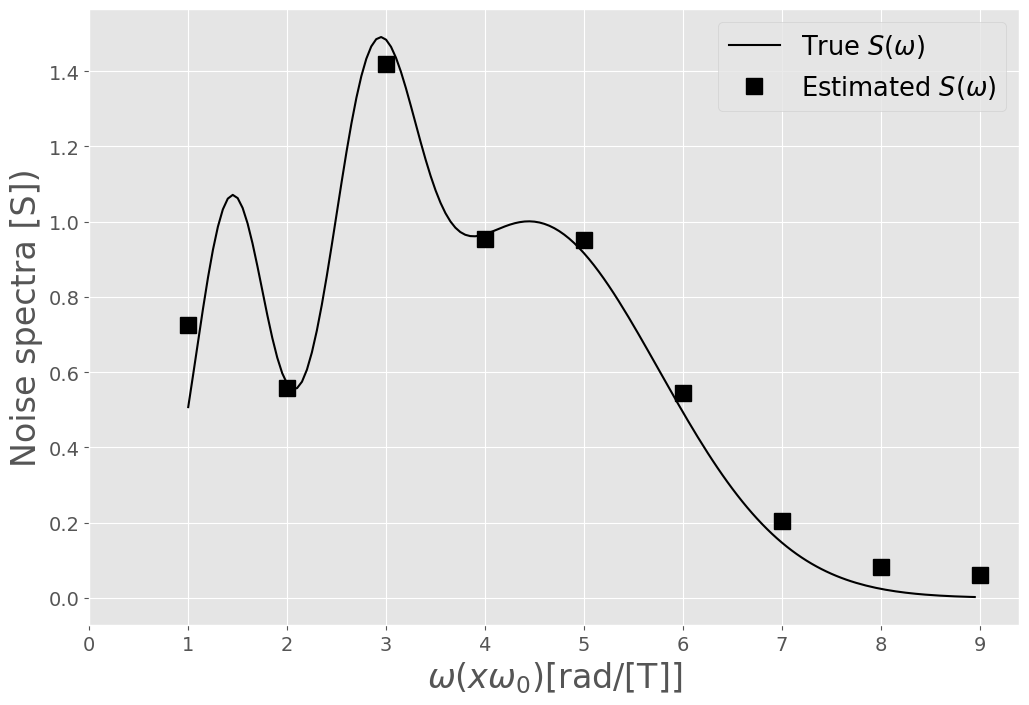

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14


plt.plot( w1, spect2, 'k',omega, S2 ,'ks', markersize = 12) 
#plt.plot( w1, spect1,'g' ,omega, S1 ,'gs', w1, spect2, 'k',omega, S2 ,'ko', w1, spect3, 'b', omega, S3 ,'b^', markersize = 12) 
plt.xlabel('$\omega( x\omega_0)$[rad/[T]]', fontsize=24)
plt.xticks(np.arange(0, (N+1)*wr(1), step=wr(1)),np.arange(0,N+1,step=1))
plt.ylabel('Noise spectra [S])', fontsize=24)
plt.legend(['True $S(\omega)$','Estimated $S(\omega)$'], prop={'size': 18.5})
#plt.legend(['True $R_1(\omega)$','Estimated $R_1(\omega)$','True $I_1(\omega)$',\
#            'Estimated $I_1(\omega)$','True $E(\omega)$','Estimated $E(\omega)$'],\
#          prop={'size': 18.5})


plt.savefig('Fig4b-d8.pdf')

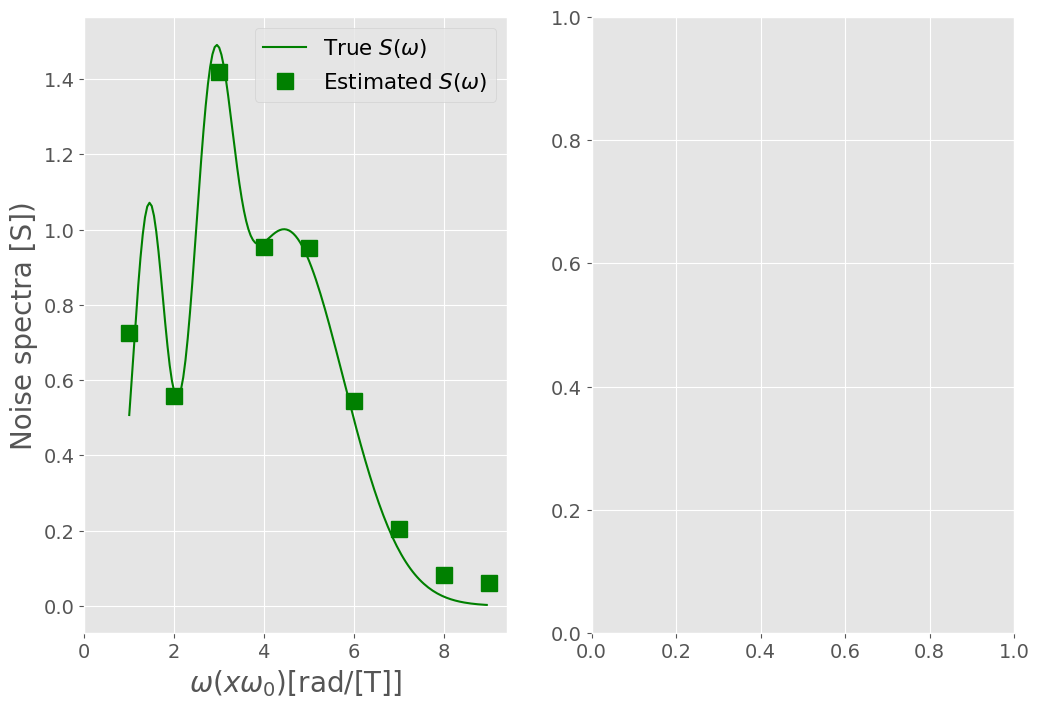

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(w1, spect2,'g-',omega, S2 ,'gs', markersize = 12)  
ax1.set_xlabel('$\omega( x\omega_0)$[rad/[T]]', fontsize=20) #
ax1.set_xticks(np.arange(0, (N+1)*wr(1), step=T*wr(1)),np.arange(0,N+1,step=T))
ax1.set_ylabel('Noise spectra [S])', fontsize=20) #
ax1.legend(['True $S(\omega)$','Estimated $S(\omega)$'],\
          prop={'size': 15.5})
##plt.show()

plt.savefig('Fig4b-d=8.pdf')

##listM = [7, 15, 35,  55,  70,  80]
##listd = [3,  4,  5,   6,   7,   8]
##ax2.plot(listM , listd ,'ko')
##ax2.set_xlabel('Iterations (M)', fontsize=13) #
##ax2.set_ylabel('Qudit order (d)', fontsize=13) #
###ax2.legend(['True $S(\omega)$','Estimated $S(\omega)$'],\
###          prop={'size': 9.5})

In [24]:
et = time.time()
elapsed_time1 = (et - st)/60
elapsed_time2 = (et - st)/3600
print('time:', elapsed_time1, 'minutes or', elapsed_time1, 'hours')   #(40 hours)

Execution time: 2446.6996804912883 minutes
